In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


In [2]:
import findspark
findspark.init(r"C:\python311\Lib\site-packages\pyspark")

In [3]:
def generate_data_classification(n_samples=200, n_features=2, n_classes=2, random_state=42):
    """
    Generate a synthetic dataset and return features + labels.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_classes=n_classes,
        n_informative=2,
        n_redundant=0,
        random_state=random_state
    )
    return X, y

In [4]:
def plot_data_and_model(X, y, model):
    """
    Plot the dataset and the decision boundary of the trained model.
    """
    plt.figure(figsize=(8,6))
    
    # Scatter plot of points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    # Decision boundary
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.title("Classification Data and Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [5]:
def train_classifier(X, y):
    """
    Train a logistic regression classifier and call the plotting function.
    """
    model = LogisticRegression()
    model.fit(X, y)
    plot_data_and_model(X, y, model)
    return model

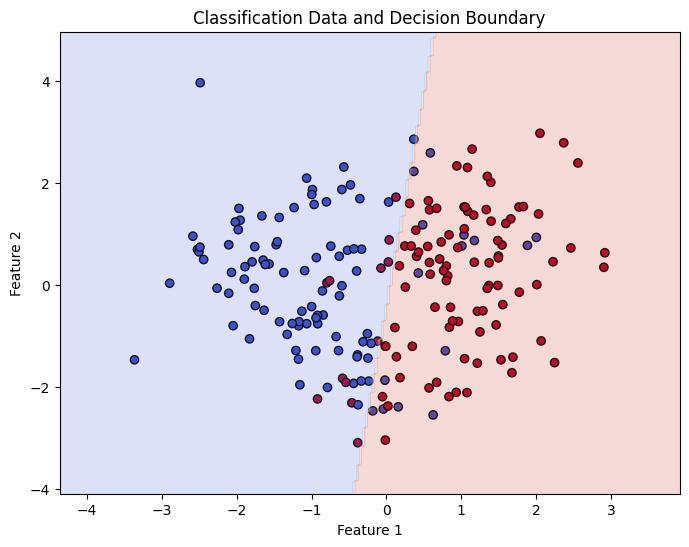

In [6]:
# Example usage:
X, y = generate_data_classification()
model = train_classifier(X, y)

In [7]:
def generate_data_bi_classification(n_samples=200, random_state=42):
    """
    Generate a synthetic binary classification dataset.
    Returns: X (features), y (labels)
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=2,       # keep 2D for easy plotting
        n_classes=2,
        n_informative=2,
        n_redundant=0,
        random_state=random_state
    )
    return X, y

In [8]:
def plot_data_and_model_bi_classification(X, y, model):
    """
    Plot the dataset and the decision boundary of the trained model.
    """
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Decision boundary grid
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
    plt.title("Binary Classification with Logistic Regression")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [9]:
def train_classifier_bi_classification(X, y):
    """
    Train a logistic regression classifier and call the plotting function.
    """
    model = LogisticRegression()
    model.fit(X, y)
    plot_data_and_model_bi_classification(X, y, model)
    return model

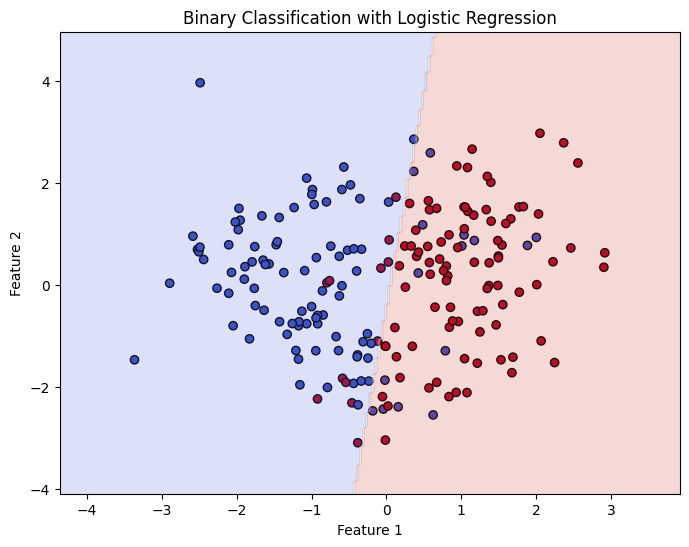

In [10]:
# Example workflow:
X, y = generate_data_bi_classification()
model = train_classifier_bi_classification(X, y)

In [11]:
#From Deepseek
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Function 1: Generate binary classification data
def generate_binary_data(n_samples=100, random_state=42):
    """
    Generate binary classification data.
    
    Returns:
    numpy array: Shape (n_samples, 3) where columns are [feature1, feature2, label]
    """
    np.random.seed(random_state)
    
    # Generate two classes with different means
    class0 = np.random.multivariate_normal(
        mean=[0, 0], 
        cov=[[1, 0.5], [0.5, 1]], 
        size=n_samples//2
    )
    class1 = np.random.multivariate_normal(
        mean=[2, 2], 
        cov=[[1, -0.3], [-0.3, 1]], 
        size=n_samples//2
    )
    
    # Combine and add labels
    X = np.vstack([class0, class1])
    y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])
    
    # Return as single numpy array
    return np.column_stack([X, y])

# Function 2: Create binary classification model
def create_binary_model(dataset):
    """
    Create and train a binary classification model.
    
    Returns:
    tuple: (model, X, y)
    """
    # Separate features and labels
    X = dataset[:, :2]  # First two columns are features
    y = dataset[:, 2]   # Last column is label
    
    # Create and train model
    model = LogisticRegression()
    model.fit(X, y)
    
    print(f"✅ Model trained with {len(X)} samples")
    print(f"✅ Class distribution: {np.bincount(y.astype(int))}")
    print(f"✅ Model accuracy: {model.score(X, y):.3f}")
    
    return model, X, y

# Function 3: Graph the data and model decision boundary
def graph_model(model, X, y):
    """
    Visualize binary classification data and model decision boundary.
    """
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create plot
    plt.figure(figsize=(10, 8))
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, 
                         cmap=plt.cm.RdYlBu, edgecolors='k', 
                         s=100, alpha=0.8)
    
    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Binary Classification Model')
    plt.colorbar(scatter, label='Class')
    plt.grid(True, alpha=0.3)
    
    plt.show()

✅ Model trained with 200 samples
✅ Class distribution: [100 100]
✅ Model accuracy: 0.940


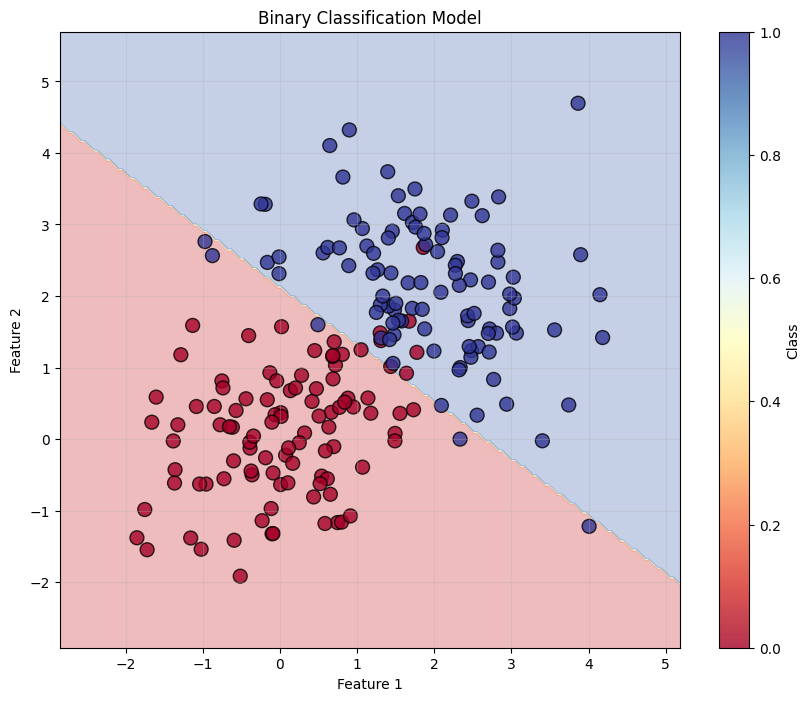

In [12]:
# Generate data
dataset = generate_binary_data(n_samples=200)

# Create model
model, X, y = create_binary_model(dataset)

# Visualize
graph_model(model, X, y)

In [13]:
#From Chat-Gpt
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [14]:
def generate_data(n_samples=300):
    """
    Generate a simple 2D binary classification dataset.
    Returns a numpy array of shape (n_samples, 3): [x1, x2, label].
    """

    # Class 0: centered at (-2, -2)
    class0 = np.random.randn(n_samples // 2, 2) * 0.8 + np.array([-2, -2])
    labels0 = np.zeros((n_samples // 2, 1))

    # Class 1: centered at (2, 2)
    class1 = np.random.randn(n_samples // 2, 2) * 0.8 + np.array([2, 2])
    labels1 = np.ones((n_samples // 2, 1))

    # Combine
    data = np.vstack((np.hstack((class0, labels0)), np.hstack((class1, labels1))))
    np.random.shuffle(data)

    return data


In [15]:
def train_model(data):
    """
    Trains a logistic regression classifier using the numpy array.
    Returns the trained model.
    """

    X = data[:, :2]      # features
    y = data[:, 2]       # labels

    model = LogisticRegression()
    model.fit(X, y)

    return model


In [17]:
def plot_results(model, data):
    """
    Plots the datapoints and model decision boundary.
    """

    X = data[:, :2]
    y = data[:, 2]

    # Plot data points
    plt.figure(figsize=(7, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")

    # Create mesh for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.25, cmap="coolwarm")
    plt.title("Binary Classification & Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


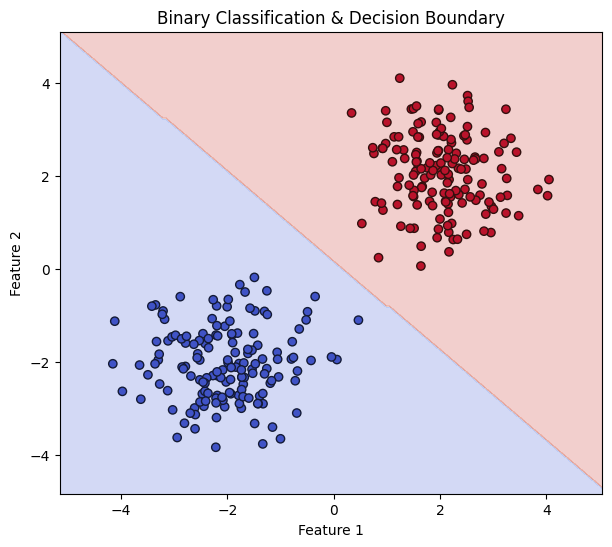

In [18]:
data = generate_data()
model = train_model(data)
plot_results(model, data)
